## nn.module로 구현하는 선형 회귀
- 이전까지는 비용함수 등을 직접 정의하여 회귀를 진행하였다면 이번에는 구현되어 있는 함수들을 호출하여 사용!

### 단순 선형 회귀 구현하기

In [2]:
#라이브러리 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
torch.manual_seed(1)

In [4]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [5]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
# 하나의 입력 x에 대해서 하나의 출력 y를 가지므로, 입력 차아ㅝㄴ과 출력 차원 모두 1을 인수로 사용
model = nn.Linear(1,1)

In [6]:
#미리 랜덤 값이 설정되어 있음
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [7]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [8]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [9]:
#임의의 입력 4를 선언
new_var = torch.FloatTensor([[4.0]])
#입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) #forward 연산
#y = 2x 이므로 입력이 4라면 y가 8에 가까운 값인 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y)
#실제 결과를 보면 7.9926으로써 8에 근사함을 알 수 있다.

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward>)


In [10]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


- H(x) 식에 입력 x로부터 예측된 y를 얻는 것을 forward 연산이라고 합니다.
- 학습 전, prediction = model(x_train)은 x_train으로부터 예측값을 리턴하므로 forward 연산입니다.
- 학습 후, pred_y = model(new_var)는 임의의 값 new_var로부터 예측값을 리턴하므로 forward 연산입니다.
- 학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것을 backward 연산이라고 합니다.
- cost.backward()는 비용 함수로부터 기울기를 구하라는 의미이며 backward 연산입니다.

### 다중 선형 회귀 구현하기

In [11]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [12]:
model = nn.Linear(3,1)

In [13]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1119,  0.2710, -0.5435]], requires_grad=True), Parameter containing:
tensor([0.3462], requires_grad=True)]


In [14]:
#optimzier 설정 : 학습률을 0.01로 할시 발산한다.
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [15]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 42134.707031
Epoch  100/2000 Cost: 5.960053
Epoch  200/2000 Cost: 5.654707
Epoch  300/2000 Cost: 5.365413
Epoch  400/2000 Cost: 5.091429
Epoch  500/2000 Cost: 4.831834
Epoch  600/2000 Cost: 4.585997
Epoch  700/2000 Cost: 4.353045
Epoch  800/2000 Cost: 4.132426
Epoch  900/2000 Cost: 3.923438
Epoch 1000/2000 Cost: 3.725488
Epoch 1100/2000 Cost: 3.537972
Epoch 1200/2000 Cost: 3.360339
Epoch 1300/2000 Cost: 3.192076
Epoch 1400/2000 Cost: 3.032686
Epoch 1500/2000 Cost: 2.881703
Epoch 1600/2000 Cost: 2.738666
Epoch 1700/2000 Cost: 2.603199
Epoch 1800/2000 Cost: 2.474860
Epoch 1900/2000 Cost: 2.353289
Epoch 2000/2000 Cost: 2.238115


In [16]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[153.7184]], grad_fn=<AddmmBackward>)


In [17]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.8541, 0.8475, 0.3096]], requires_grad=True), Parameter containing:
tensor([0.3568], requires_grad=True)]


### 클래스로 파이토치 모델 구현하기
- 단수 선형 회귀 모델

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [19]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [20]:
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
     #모델의 구조와 동작을 정의하는 생성자를 정의
    def __init__(self):
        #spuer() 함수를 부르면 여기서 만든 클래스는 nn.Module 클래스들의 속성들을 가지고 초기화된다.
        super().__init__()
        self.linear = nn.Linear(1, 1) #단순 선형회귀 이므로 input_dim = 1, output_dim =1
    
    def forward(self, x):
        return self.linear(x)


In [21]:
model = LinearRegressionModel()

In [22]:
optimzer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [23]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 13.103541
Epoch  200/2000 Cost: 13.103541
Epoch  300/2000 Cost: 13.103541
Epoch  400/2000 Cost: 13.103541
Epoch  500/2000 Cost: 13.103541
Epoch  600/2000 Cost: 13.103541
Epoch  700/2000 Cost: 13.103541
Epoch  800/2000 Cost: 13.103541
Epoch  900/2000 Cost: 13.103541
Epoch 1000/2000 Cost: 13.103541
Epoch 1100/2000 Cost: 13.103541
Epoch 1200/2000 Cost: 13.103541
Epoch 1300/2000 Cost: 13.103541
Epoch 1400/2000 Cost: 13.103541
Epoch 1500/2000 Cost: 13.103541
Epoch 1600/2000 Cost: 13.103541
Epoch 1700/2000 Cost: 13.103541
Epoch 1800/2000 Cost: 13.103541
Epoch 1900/2000 Cost: 13.103541
Epoch 2000/2000 Cost: 13.103541


- 다중 선형 회귀 클래스로 구현하기

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [25]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [26]:
class MultivatriteLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀 이므로 input_dim =3, output_dim = 1
        
    def forward(self, x):
        return self.linear(x)

In [27]:
model = MultivatriteLinearRegressionModel()

In [28]:
optimizer = torch.optim.SGD(model.parameters(), lr =1e-5)

In [29]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))


Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225988
Epoch  200/2000 Cost: 0.223910
Epoch  300/2000 Cost: 0.221930
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218270
Epoch  600/2000 Cost: 0.216571
Epoch  700/2000 Cost: 0.214955
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211949
Epoch 1000/2000 Cost: 0.210558
Epoch 1100/2000 Cost: 0.209237
Epoch 1200/2000 Cost: 0.207971
Epoch 1300/2000 Cost: 0.206764
Epoch 1400/2000 Cost: 0.205616
Epoch 1500/2000 Cost: 0.204527
Epoch 1600/2000 Cost: 0.203479
Epoch 1700/2000 Cost: 0.202487
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200638
Epoch 2000/2000 Cost: 0.199769


In [30]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


## 미니 배치와 데이터 로드(Mini Batch and Data Load)
- 미니 배치와 배치 크기(Mini Batch and Batch Size

In [31]:
#데이터
x_train = torch.FloatTensor([[73, 80, 73],
                            [93, 88, 93],
                            [89, 91, 90],
                            [96, 98, 100],
                            [73, 66, 70]])
y_train = torch.FloatTensor([[152],[185], [180], [196], [142]])

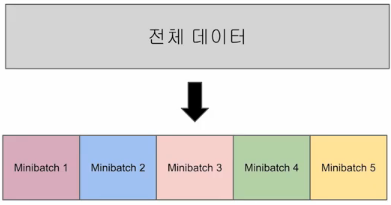
- 에포크(epoch) : 전체 훈련 데이터가 학습에 한 번 사용된 주기
- 배치 크기(batch size) : 미니 배치의 크기
- 미니 배치 경사 하강법 : 미니 배치 단위로 경사 하강법을 수행하는 방법

배치 경사 하강법은 전체 데이터를 사용해서 경사 하강법을 하므로 최적갑 수렴이 안정적이지만, 계산량이 매우 크다. 따라서 미니 배치 경사 하강법을 통해 수렴 과정의 한계는 있지만 훈련 속도가 매우 빠릅니다.

## 이터레이션(iteration)

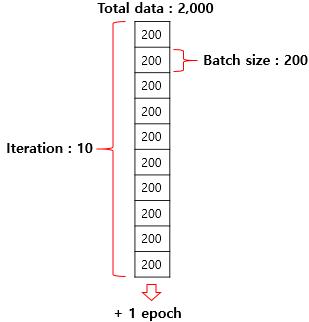
- 이터레이션은 한 번의 에포크 내에서 이루어지는 매개변수인 가중치 W와 b의 업데이트 횟수입니다.
- 예를 들어 전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10개입니다.

### 데이터 로드하기(Data Load)
유용한 도구인 데이터셋(Dataset)과 데이터로더(DataLoader)를 이용해 미니 배치 학습, 데이터 셔플, 병렬 처리까지 간단히 수행가능합니다.

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [33]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [34]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [35]:
dataset = TensorDataset(x_train, y_train)

In [36]:
dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)

In [37]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [38]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    print(batch_idx)
    print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

0
[tensor([[93., 88., 93.],
        [73., 66., 70.]]), tensor([[185.],
        [142.]])]
Epoch    0/20 Batch 1/3 Cost: 37210.574219
1
[tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]]), tensor([[196.],
        [180.]])]
Epoch    0/20 Batch 2/3 Cost: 16463.394531
2
[tensor([[73., 80., 75.]]), tensor([[152.]])]
Epoch    0/20 Batch 3/3 Cost: 2130.966309
0
[tensor([[73., 80., 75.],
        [89., 91., 90.]]), tensor([[152.],
        [180.]])]
Epoch    1/20 Batch 1/3 Cost: 1196.248047
1
[tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]]), tensor([[142.],
        [196.]])]
Epoch    1/20 Batch 2/3 Cost: 607.885559
2
[tensor([[93., 88., 93.]]), tensor([[185.]])]
Epoch    1/20 Batch 3/3 Cost: 302.890442
0
[tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]]), tensor([[142.],
        [196.]])]
Epoch    2/20 Batch 1/3 Cost: 45.500126
1
[tensor([[73., 80., 75.],
        [93., 88., 93.]]), tensor([[152.],
        [185.]])]
Epoch    2/20 Batch 2/3 Cost: 19.989744
2
[tensor([[89., 91.

In [39]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[156.5338]], grad_fn=<AddmmBackward>)
